In [1]:
from pathlib import Path
import xarray as xr

In [2]:
loc = Path("/Users/brianpm/Dropbox/Data/GPCP/daily")
fils = sorted(loc.glob("*.nc"))
print(f"{len(fils) = }")

len(fils) = 9404


In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

In [26]:
ds = xr.open_mfdataset(fils[0:100])
print(ds.time[0])
print(ds.time[-1])

<xarray.DataArray 'time' ()> Size: 8B
array('1996-10-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 1996-10-01
Attributes:
    long_name:      time
    standard_name:  time
    axis:           T
    bounds:         time_bounds
<xarray.DataArray 'time' ()> Size: 8B
array('1997-01-08T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 1997-01-08
Attributes:
    long_name:      time
    standard_name:  time
    axis:           T
    bounds:         time_bounds


FrozenMappingWarningOnValuesAccess({'latitude': 180, 'longitude': 360, 'time': 1, 'nv': 2})

Text(1.0, 1.0, 'mx: 99.59, av: 2.72, mn: 0.00')

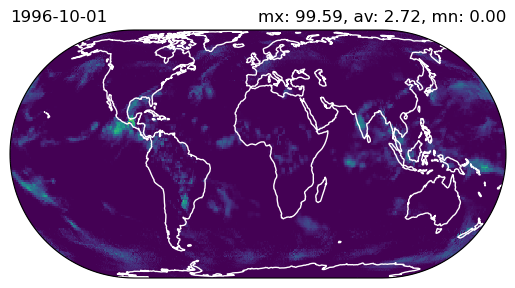

In [25]:
fig, ax = plt.subplots(subplot_kw={"projection":ccrs.EckertIV()})

mlon, mlat = np.meshgrid(ds.longitude, ds.latitude)

coslat = np.cos(np.radians(ds['latitude']))

pd = ds['precip'].squeeze()
ax.pcolormesh(mlon, mlat, pd, transform=ccrs.PlateCarree())
ax.coastlines(color='white')
ax.set_title(f"{pd['time'].dt.strftime("%Y-%m-%d").item()}", loc='left')
ax.set_title(f"mx: {pd.max().item():4.2f}, av: {pd.weighted(coslat).mean().item():4.2f}, mn: {pd.min().item():4.2f}", loc='right')